In [2]:
import sys
sys.path.insert(0, '..')

from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] Your Python version is 3.9.22 (main, May 30 2025, 05:30:51) [MSC v.1929 64 bit (AMD64)]
[OK] numpy 1.21.2
[OK] matplotlib 3.4.3
[OK] sklearn 1.0
[OK] pandas 1.3.2


In [3]:
from IPython.display import Image
%matplotlib inline

In [4]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''


df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [6]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [7]:
# remove rows that contain missing values

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
# only drop rows where all columns are NaN

df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
# drop rows that have fewer than 3 real values 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputing missing values


Sometimes, data is missing in a dataset. The easiest way to handle this is to just remove the missing parts. But this can be a problem:

* If we remove too many rows, we won’t have enough data left to learn from.
* If we remove too many columns (features), we might lose important information that helps our model make good predictions.

### A Better Option: Filling in the Missing Data

Instead of removing data, we can *fill in* the missing values using a method called **imputation**.

One simple way is **mean imputation**:
We replace a missing value with the **average** of that column.

For example, if the height column is missing a number, we use the average height of all the other rows to fill it in.

In Python, we can use the **`SimpleImputer`** class from **scikit-learn** to do this automatically.


In [29]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'green'

In [ ]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


### Using `SimpleImputer` to Fill in Missing Data

In the last section, we used a tool called **`SimpleImputer`** from **scikit-learn** to fill in missing values in our data.
This tool is part of something called the **transformer API** in scikit-learn. Don't worry—it’s not related to the fancy "Transformer" models used in language tasks like chatbots or translation. (We’ll learn about *those* in Chapter 16.)

---

### Transformers in Scikit-learn (Not the AI Kind!)

Scikit-learn transformers are tools that **change** (or *transform*) your data before it's used to train a model.
They mainly use two steps:

1. **fit** – Learn from the training data
2. **transform** – Use what was learned to change the data

Both steps are always done on arrays (tables of numbers) that have the **same number of columns** (features).


### What About Classifiers?

The models we used earlier—like decision trees or logistic regression—are called **estimators** in scikit-learn.

They also use the **fit** method to learn from the training data. But they can do more:

* They can **predict** labels (like "spam" or "not spam") for new data.
* Some can also **transform** data, just like the `SimpleImputer`.


---

### Summary

| Tool                                   | Purpose                   | Main Methods                            |
| -------------------------------------- | ------------------------- | --------------------------------------- |
| `SimpleImputer`                        | Fill in missing values    | `fit`, `transform`                      |
| Classifier (e.g., Logistic Regression) | Learn to make predictions | `fit`, `predict`, sometimes `transform` |



### 🧠 What is Categorical Data?

Not all data is made of numbers. Sometimes, we work with **categories** — like shirt sizes or colors. This kind of data is called **categorical data**.

---

### 🧱 Two Types of Categorical Data:

| Type        | Can be ordered? | Example                             |
| ----------- | --------------- | ----------------------------------- |
| **Ordinal** | ✅ Yes           | Shirt sizes: Small → Medium → Large |
| **Nominal** | ❌ No            | Shirt colors: Red, Blue, Green      |

* **Ordinal** means there’s a natural order.
* **Nominal** means the items are just names, with no order.

---

### 🤖 Why Does This Matter?

Machines (like computers or AI) don’t understand words — they understand **numbers**.

Before we can use categorical data in machine learning, we must **turn it into numbers**.

* For **ordered stuff** (like sizes), we give them numbers based on rank (e.g. S = 1, M = 2, L = 3).
* For **unordered stuff** (like colors), we create special columns for each option (we’ll explain this next — it’s called **one-hot encoding**).

---

### 📌 Summary:

* Real-world data often includes categories like size or color.
* There are two types:

  * **Ordinal** = ordered
  * **Nominal** = just names, no order
* We need to **convert** them into numbers before using them in machine learning.



In [ ]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### 🎯 What Does "Mapping Ordinal Features" Mean?

When we have **ordered categories** (like shirt sizes: M, L, XL), we need to **tell the computer** what that order is — because computers can’t figure it out on their own.

---

### 🧵 Example: Shirt Sizes

Let’s say we have shirt sizes like this:

* **M** (Medium)
* **L** (Large)
* **XL** (Extra Large)

These clearly have an order:
**XL is bigger than L, which is bigger than M**

But the computer only sees letters — it doesn’t understand the order.

---

### 🔢 So What Do We Do?

We **give each size a number**, so the machine can understand the order:

* M → 0
* L → 1
* XL → 2

Now the computer knows:
**XL (2) > L (1) > M (0)**

---

### ❗Important Note:

We have to **set this mapping ourselves** — the computer won’t guess the order correctly on its own.

---

### ✅ Summary

* **Ordinal features** have a clear order (like sizes or levels).
* We need to **convert them to numbers** to help the computer learn.
* We **choose the numbers ourselves** to reflect the correct order.




In [ ]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [ ]:
# reverse mapping
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [ ]:
# one-hot encoding via pandas

pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [ ]:
# multicollinearity guard in get_dummies

pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [ ]:
# multicollinearity guard for the OneHotEncoder

color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

### 🌈 What If Categories Have No Order? (Nominal Data)

When categories **don’t have any natural order** — like colors or countries — we call them **nominal features**.

🧠 Computers still need numbers, not names.
So how do we turn these categories into numbers?

---

### 🥇 Most Common: **One-Hot Encoding**

Each category gets its **own column**.
If the category is present, we write **1**; if not, we write **0**.

Example: Red, Green, Blue → 3 columns
✅ Works well, but **can be too big** if there are **lots** of categories (like 1,000+ cities).

---

### 🧠 Other Smart Ideas for Big Category Lists:

#### 1. **Binary Encoding**

* First, give each category a number.
* Then, convert that number into **binary** (just 1s and 0s).
* These binary digits become new columns.

🧮 It uses **fewer columns** than one-hot.
Good for **lots of categories**.

---

#### 2. **Count or Frequency Encoding**

* Replace each category with **how many times** it appears in the data.

Example:
If “Apple” appears 10 times and “Banana” 5 times:
Apple → 10
Banana → 5

🚀 It’s simple and **uses only one column**.

---

### 🤖 Bonus Tools

There’s a special Python library called
**`category_encoders`**
It gives you all these encoding options and works well with scikit-learn.

Website: [category\_encoders](https://contrib.scikit-learn.org/category_encoders/)

---

### ⚠️ No Method Is Always Best

These methods are like tools in a toolbox.
Depending on your data and model, **some work better than others**.
You can test different ones to see which improves your model.

---

### 🔢 Optional: Encoding Ordinal Features (with Thresholds)

What if we **don’t know the exact distance** between ordinal categories (like how much bigger XL is compared to M)?

You can create new **Yes/No (0/1)** columns like:

* Is size > M?
* Is size > L?

Each row gets a 0 or 1 depending on the answer.
This helps the model learn order **without needing exact numbers**.



In [ ]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


### Partitioning a dataset into a separate training and test set

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)


### ⚖️ Why Feature Scaling Matters

Imagine you're comparing **height in centimeters (like 160–190)** and **income in dollars (like 20,000–100,000)**.

💡 **Most machine learning models** think that **bigger numbers = more important**
So, if we don't fix this, models might **focus too much on income** just because the numbers are bigger — not because it's more useful!

---

### 🚫 Who Doesn't Care About Scaling?

* **Decision Trees**
* **Random Forests**

🌳 These models look at rules and splits — they don’t care about number size.
So scaling doesn't matter to them.

---

### ✅ Who Needs Scaling?

* **K-Nearest Neighbors (KNN)**
* **Gradient Descent-based models**
* **Logistic Regression**, **SVMs**, **Neural Networks**

For these, **scaling is super important**, or else they behave badly.

---

### 🧪 Example

Say we’re using two features:

* **Age**: ranges from 1 to 10
* **Income**: ranges from 1 to 100,000

If we don’t scale, the model will mostly focus on **income** just because the numbers are huge.

---

### 🧰 Two Common Ways to Scale Features

#### 1. **Normalization (Min-Max Scaling)**

📏 Shrinks all values to a range between **0 and 1**
So even big numbers get small.

#### 2. **Standardization (Z-score Scaling)**

🎯 Makes the data have **mean = 0** and **standard deviation = 1**
Useful when data has outliers or weird shapes.

---

### 🧠 Takeaway

If you're using models that care about distance or gradients,
**always scale your features** — it helps your model **learn faster and better**.



In [31]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [32]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

LogisticRegression(penalty='l1')

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# weaker or stronger, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [35]:
lr.intercept_

array([-1.26343021, -1.21581801, -2.37159745])

In [36]:
np.set_printoptions(8)

In [37]:
lr.coef_[lr.coef_!=0].shape

(23,)

In [38]:
lr.coef_

array([[ 1.24577854,  0.18045933,  0.74523542, -1.16289812,  0.        ,
         0.        ,  1.16290769,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55363524,  2.50990211],
       [-1.53699834, -0.38747997, -0.99503031,  0.36500633, -0.05983507,
         0.        ,  0.66848602,  0.        ,  0.        , -1.93437426,
         1.23296081,  0.        , -2.23188444],
       [ 0.1349355 ,  0.16988515,  0.35763496,  0.        ,  0.        ,
         0.        , -2.43426032,  0.        ,  0.        ,  1.56159027,
        -0.81692046, -0.49741185,  0.        ]])

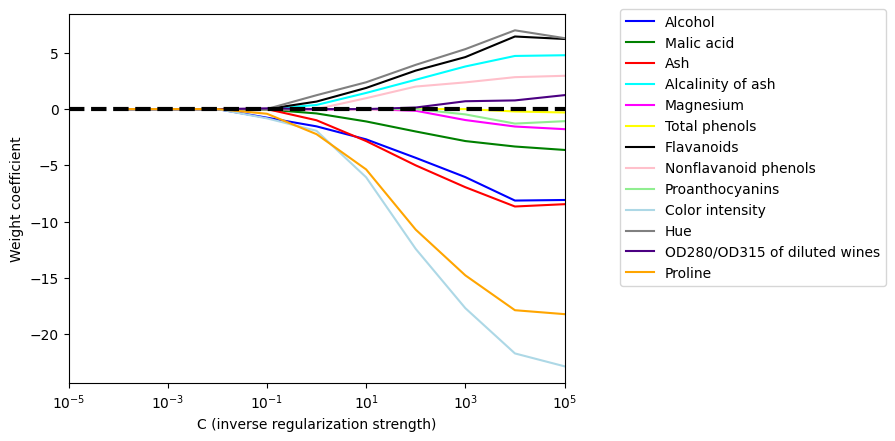

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)

plt.show()

In [41]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

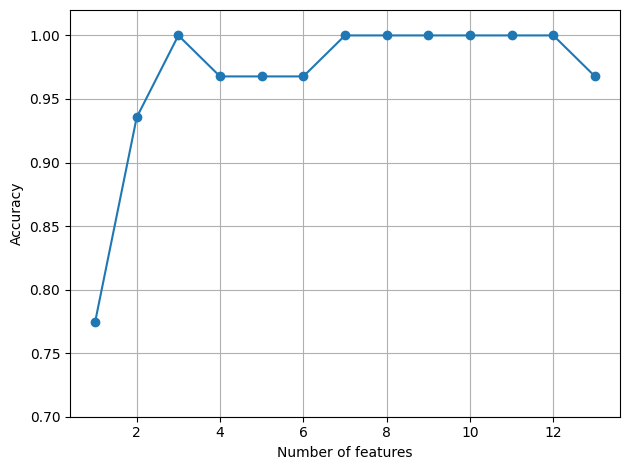

In [42]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()

plt.show()

**What the plot above shows**

* As you remove features one by one, the plot shows how the accuracy changes.

* If accuracy stays high even with fewer features, those features are important and good to keep.

* If accuracy drops quickly, some features might be critical.

In [43]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [44]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [45]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


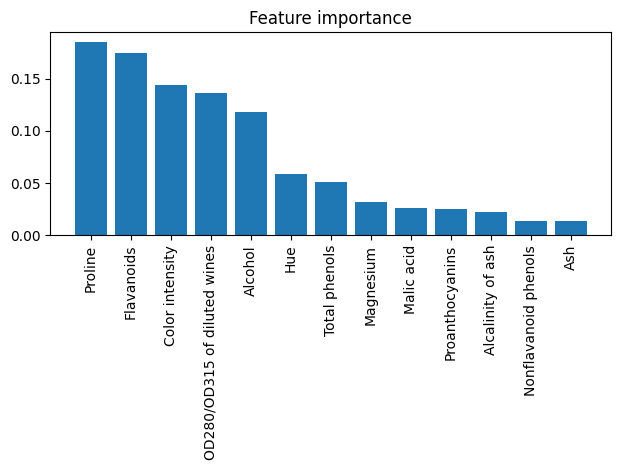

In [47]:
# Assessing feature importance with Random Forests
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

In [48]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [49]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
